In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')

In [3]:
df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [6]:
df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

# Vizualization Section

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

# Line plot

In [9]:
cols = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success']

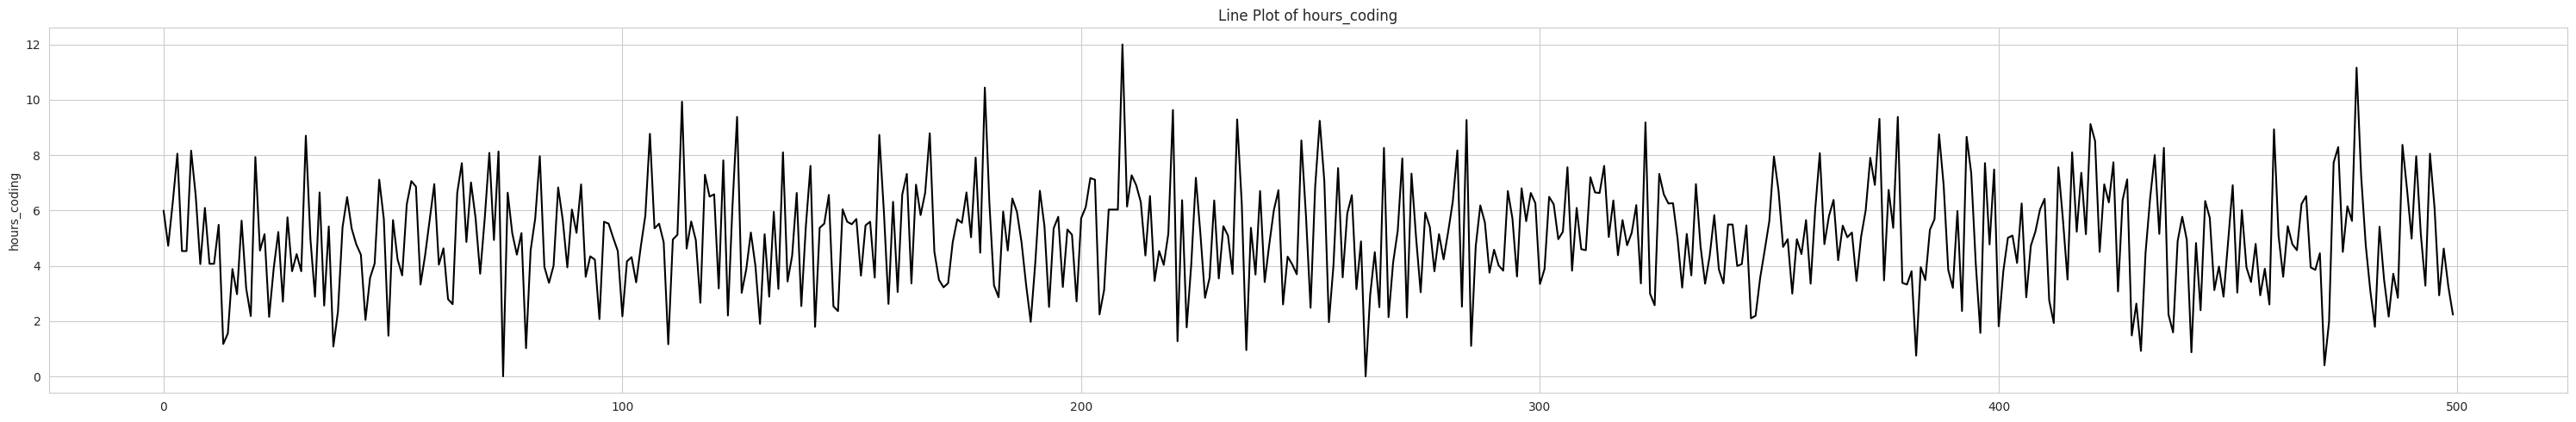

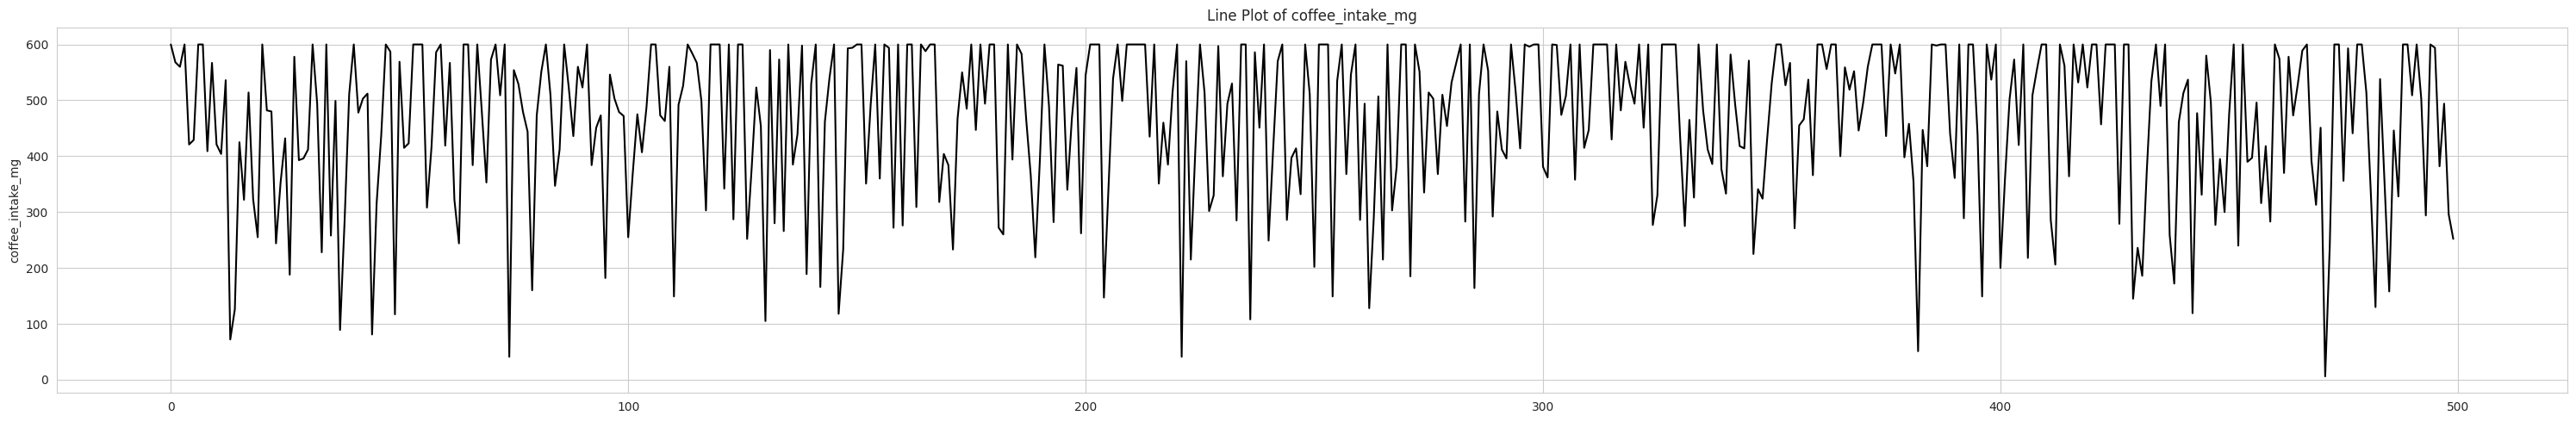

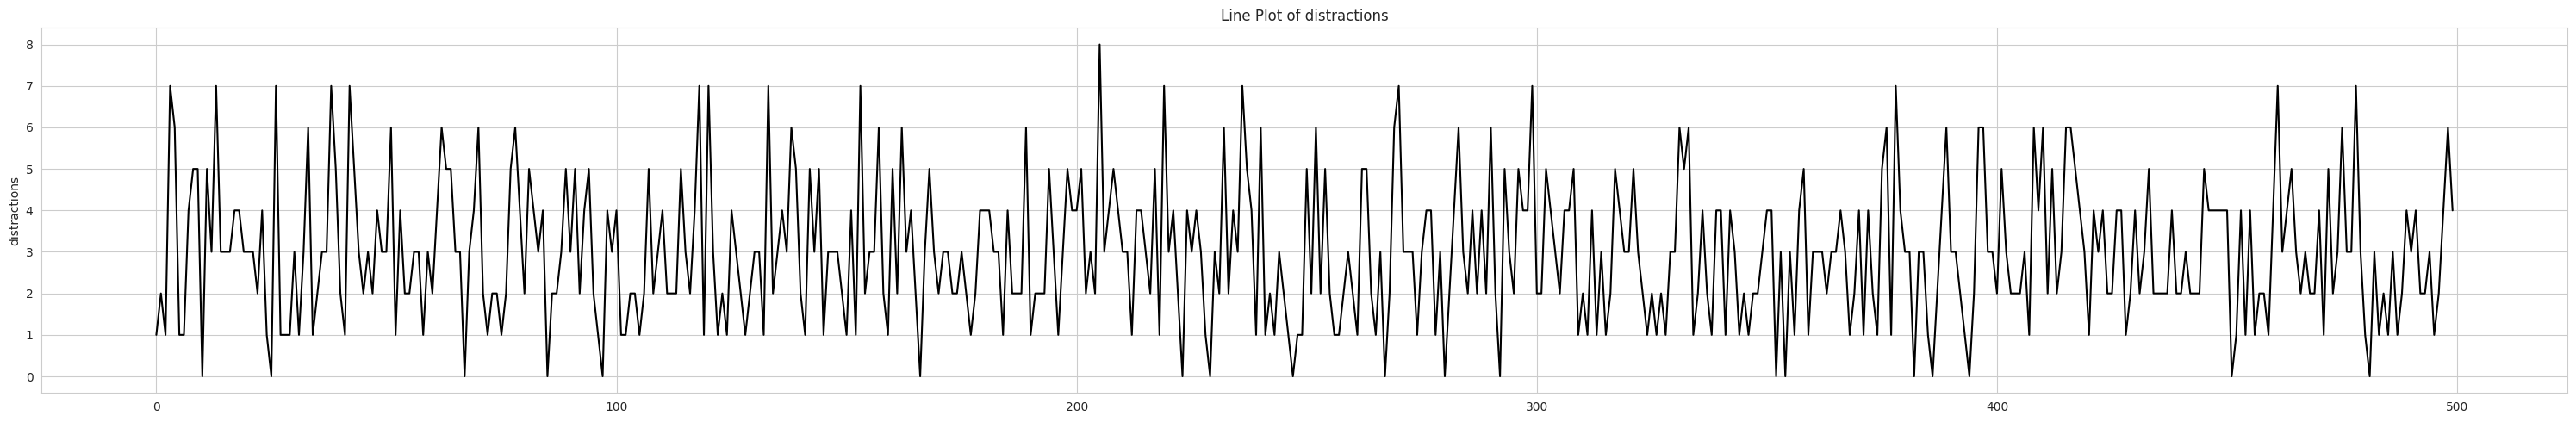

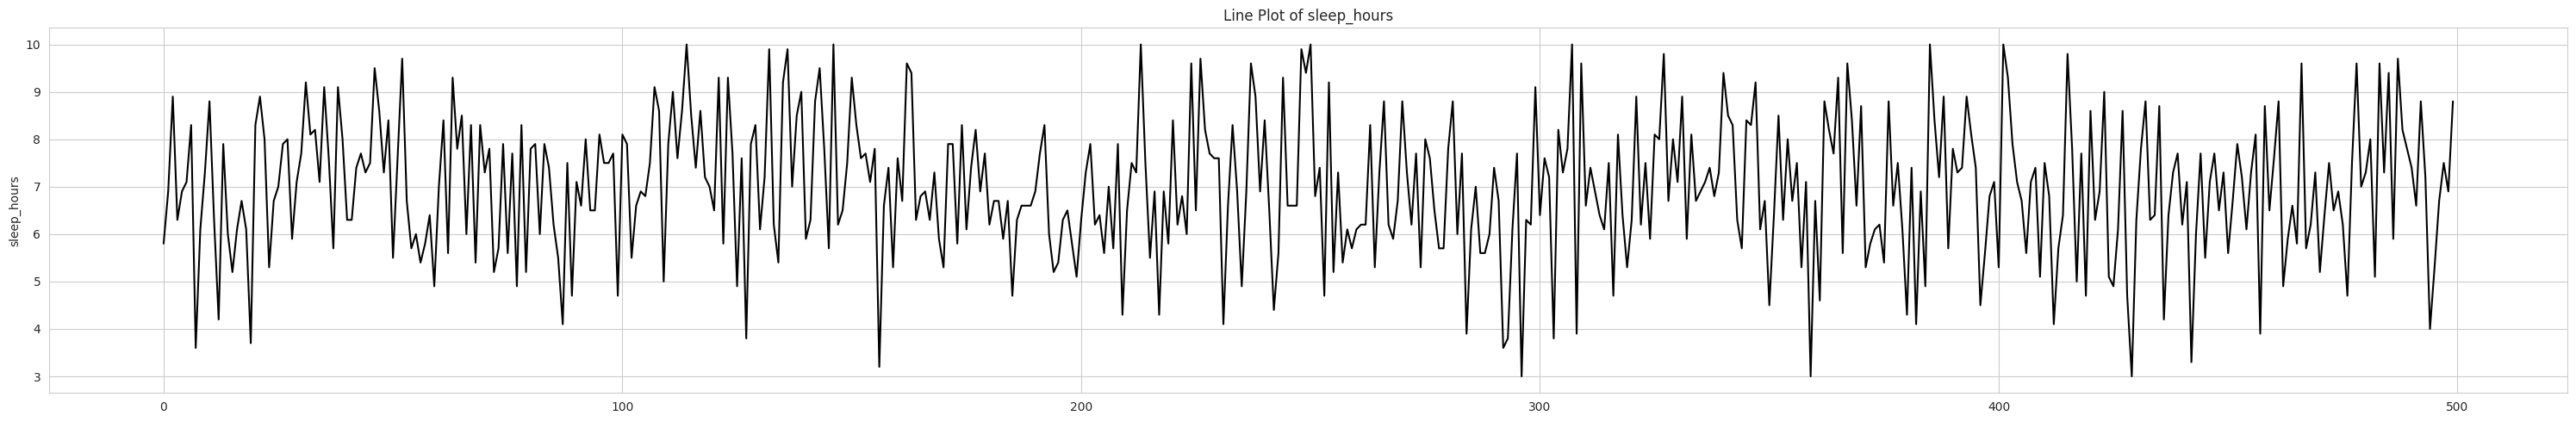

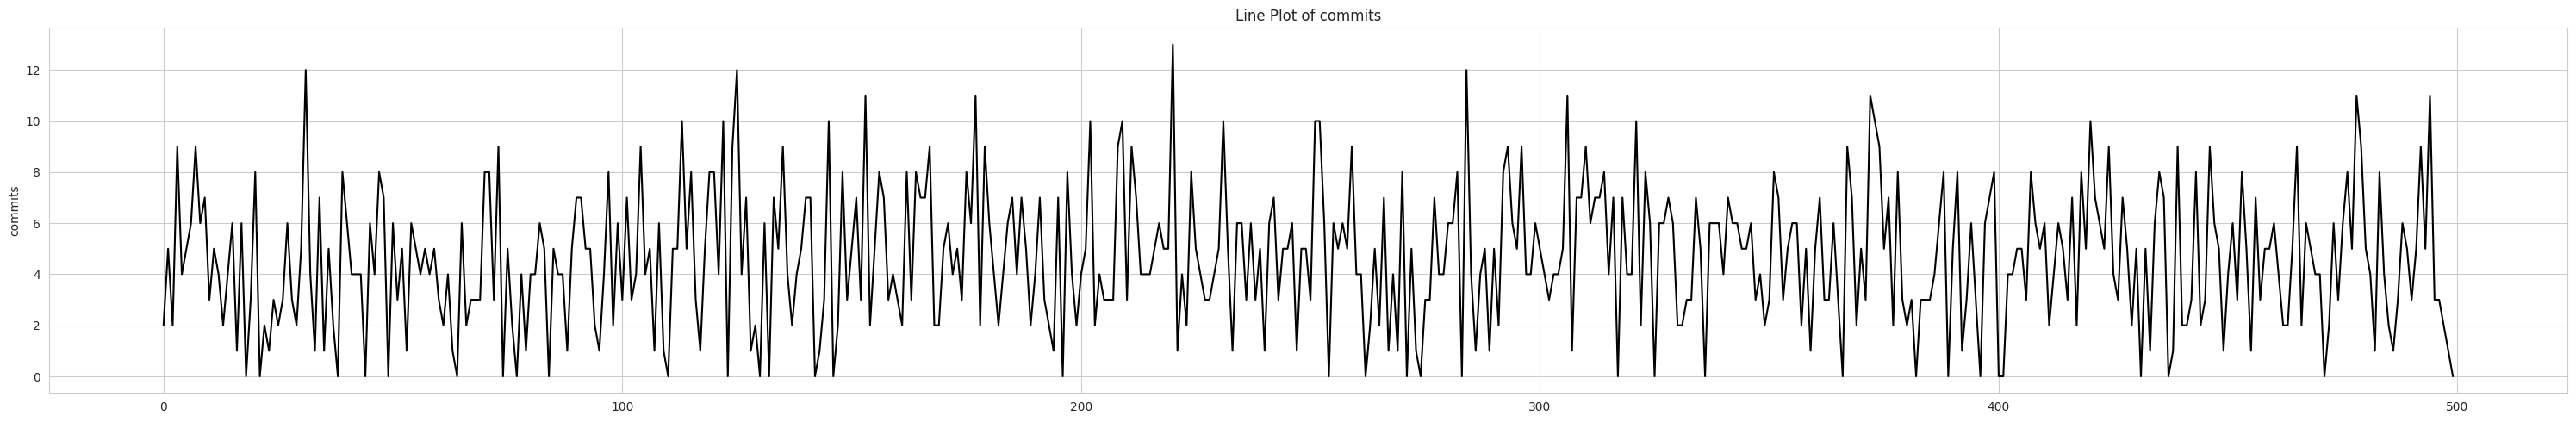

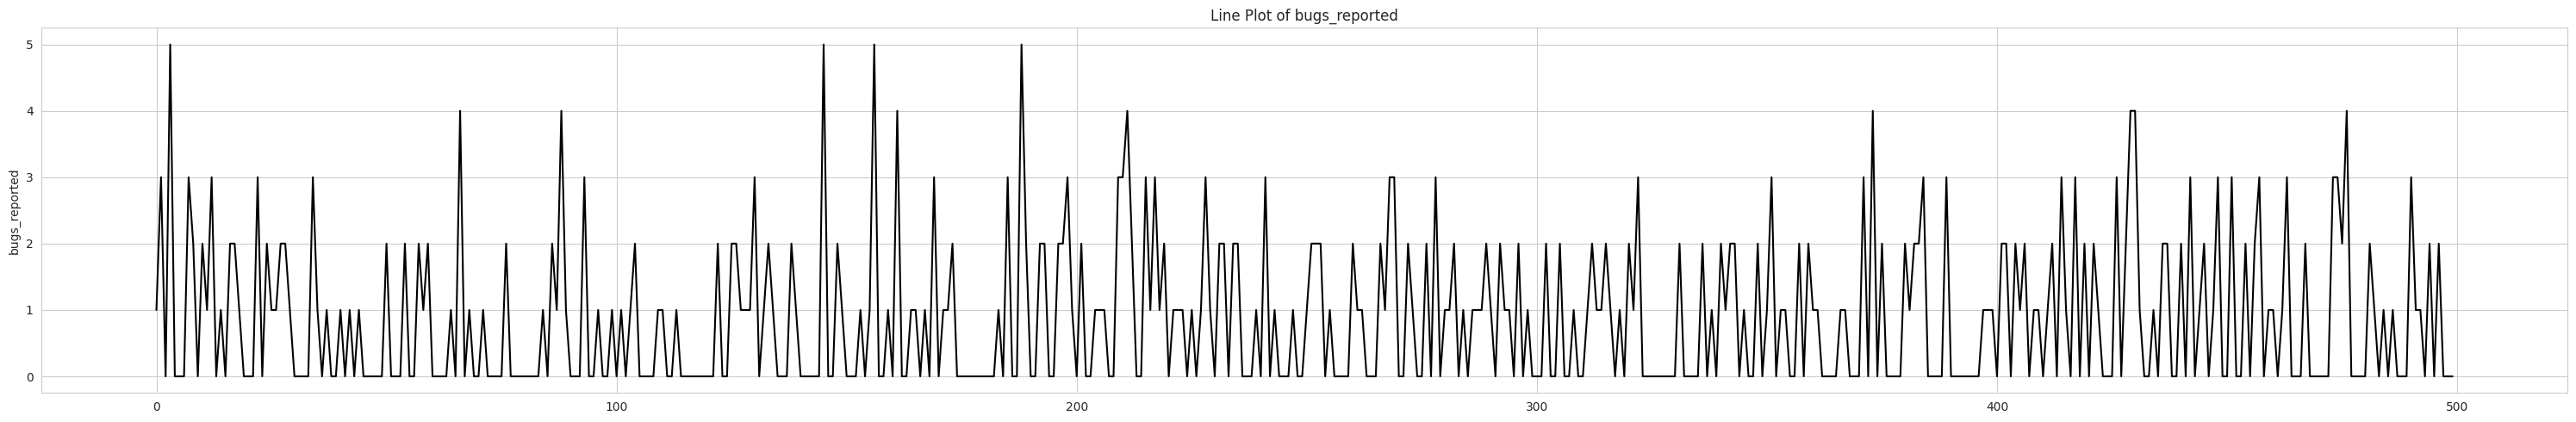

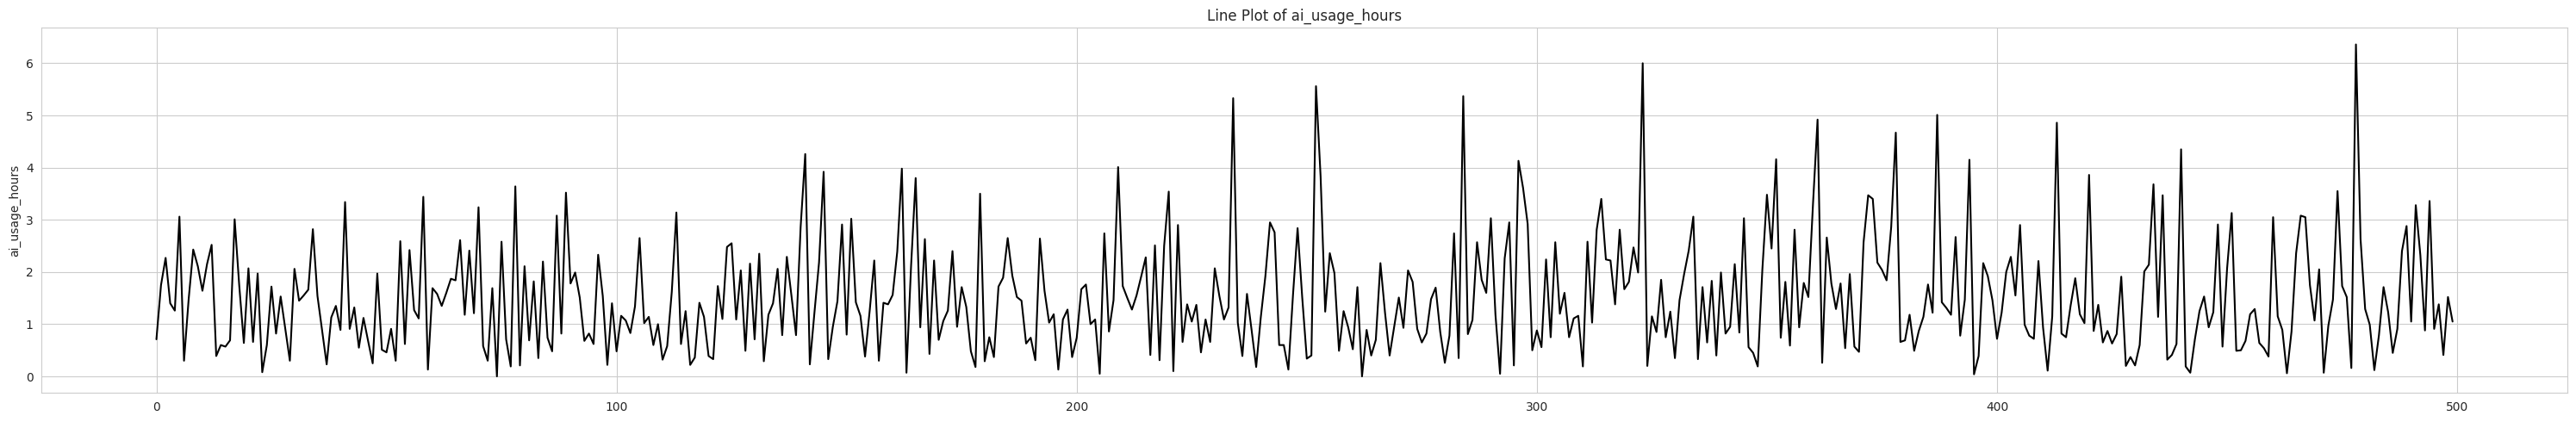

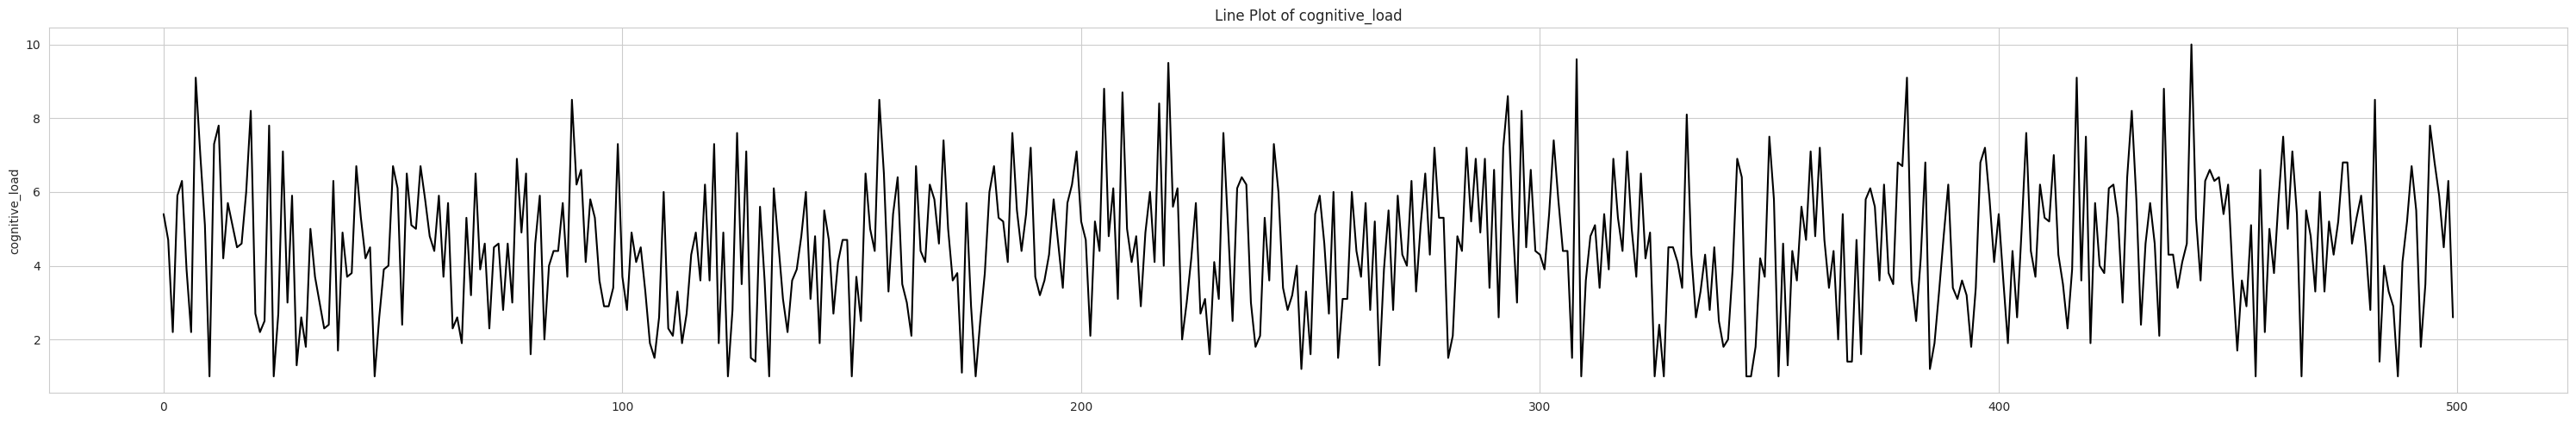

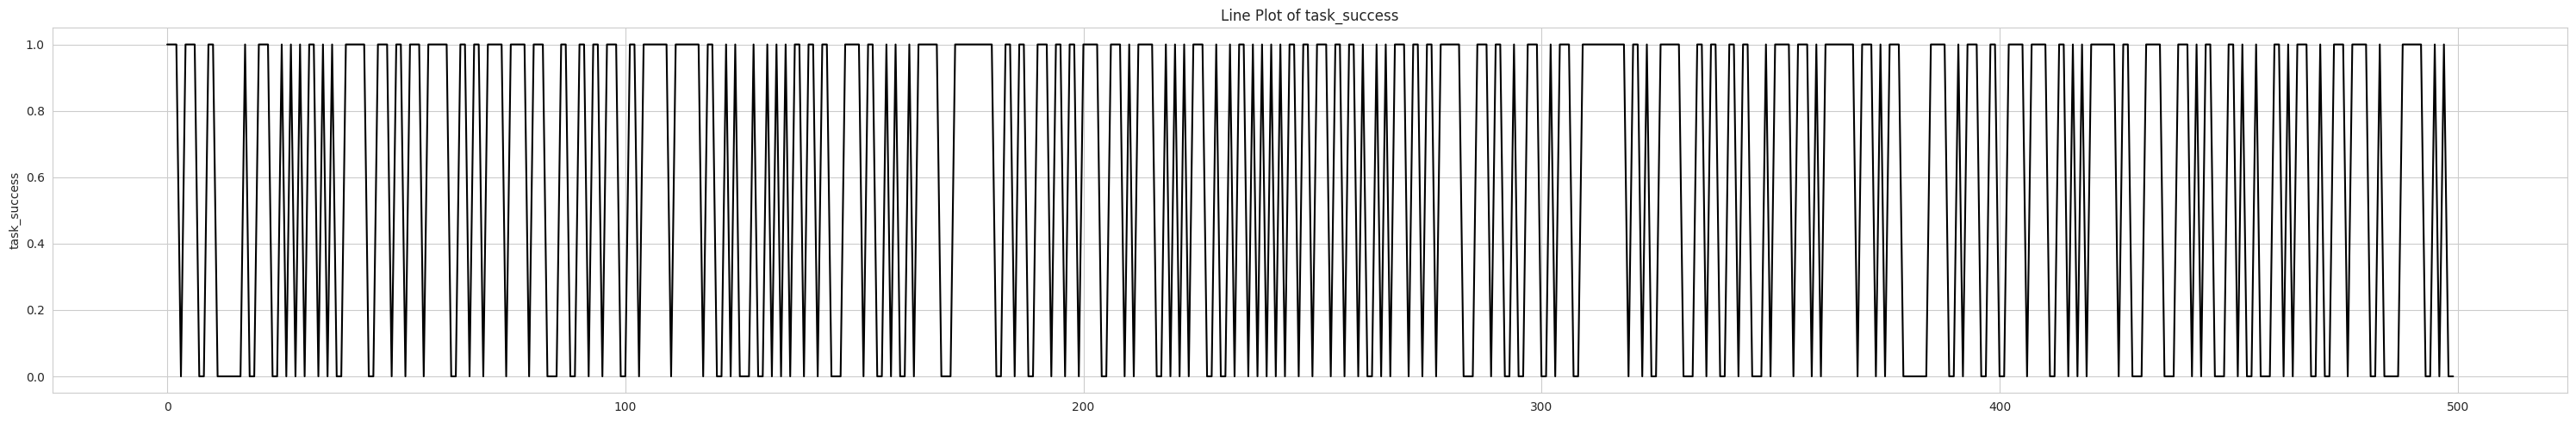

In [10]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(30,5))
        sns.lineplot(df[features].dropna(),color='black')
        plt.title(f'Line Plot of {features}')
        plt.tight_layout()
        plt.show()

# Count plot

In [11]:
cols2 = ['distractions',
 'sleep_hours',
 'commits',
 'bugs_reported',
 'ai_usage_hours',
 'cognitive_load',
 'task_success']

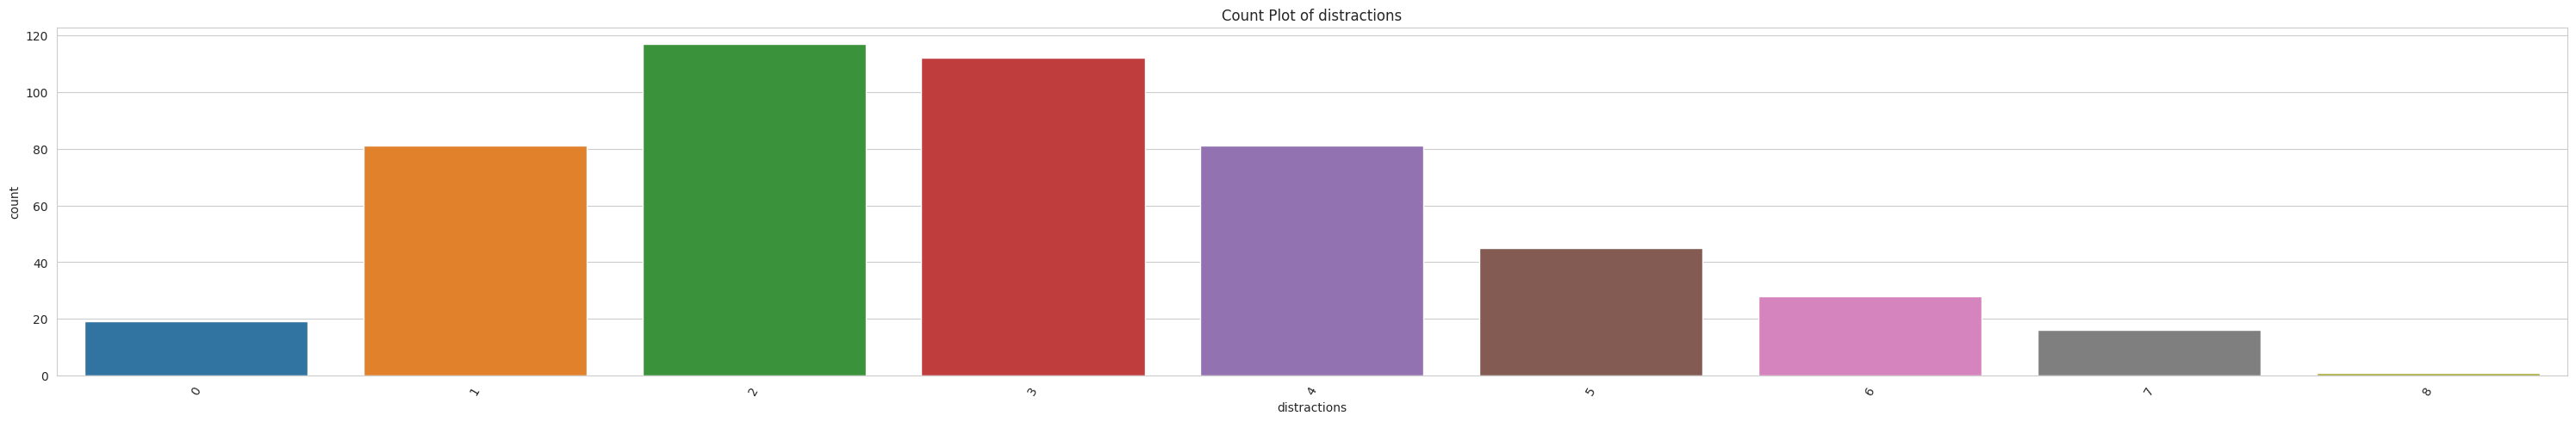

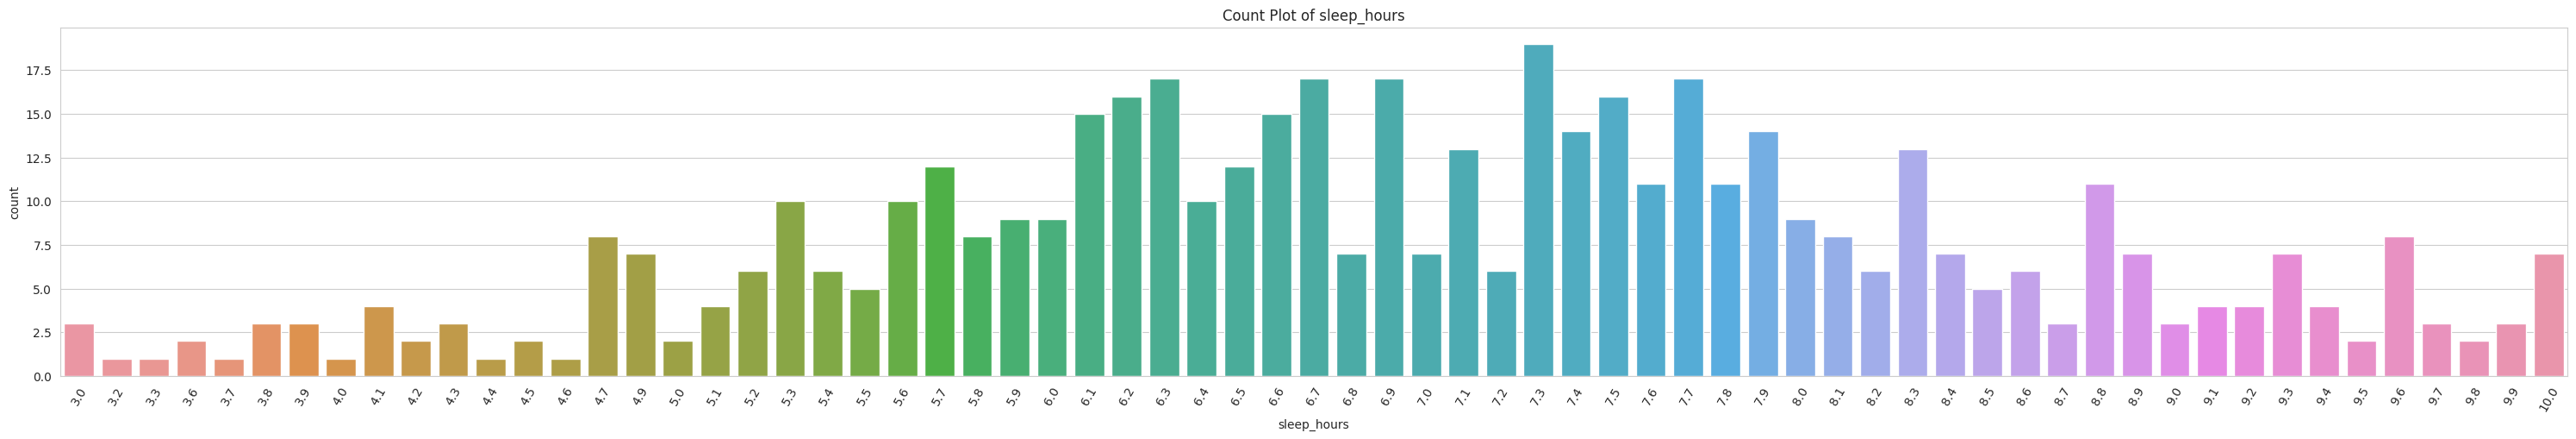

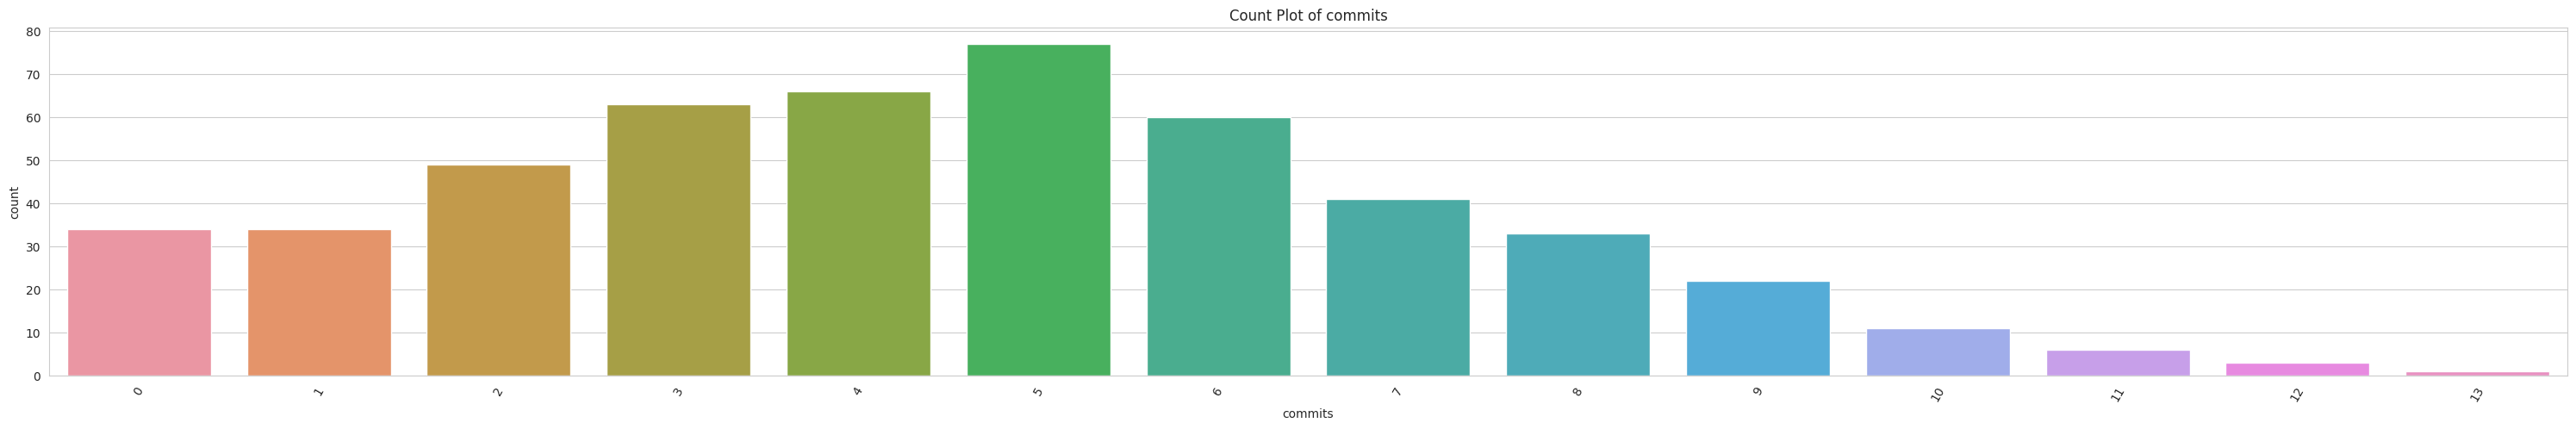

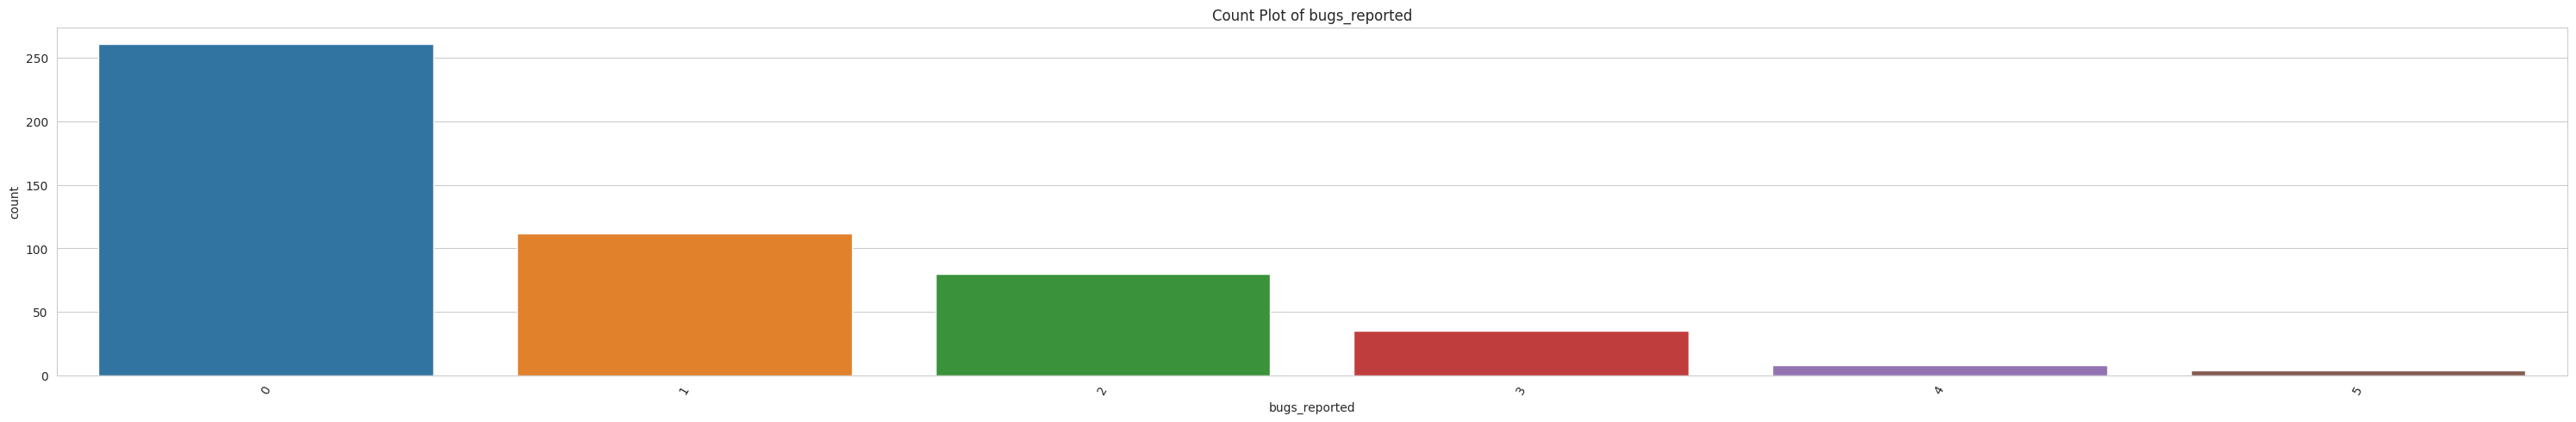

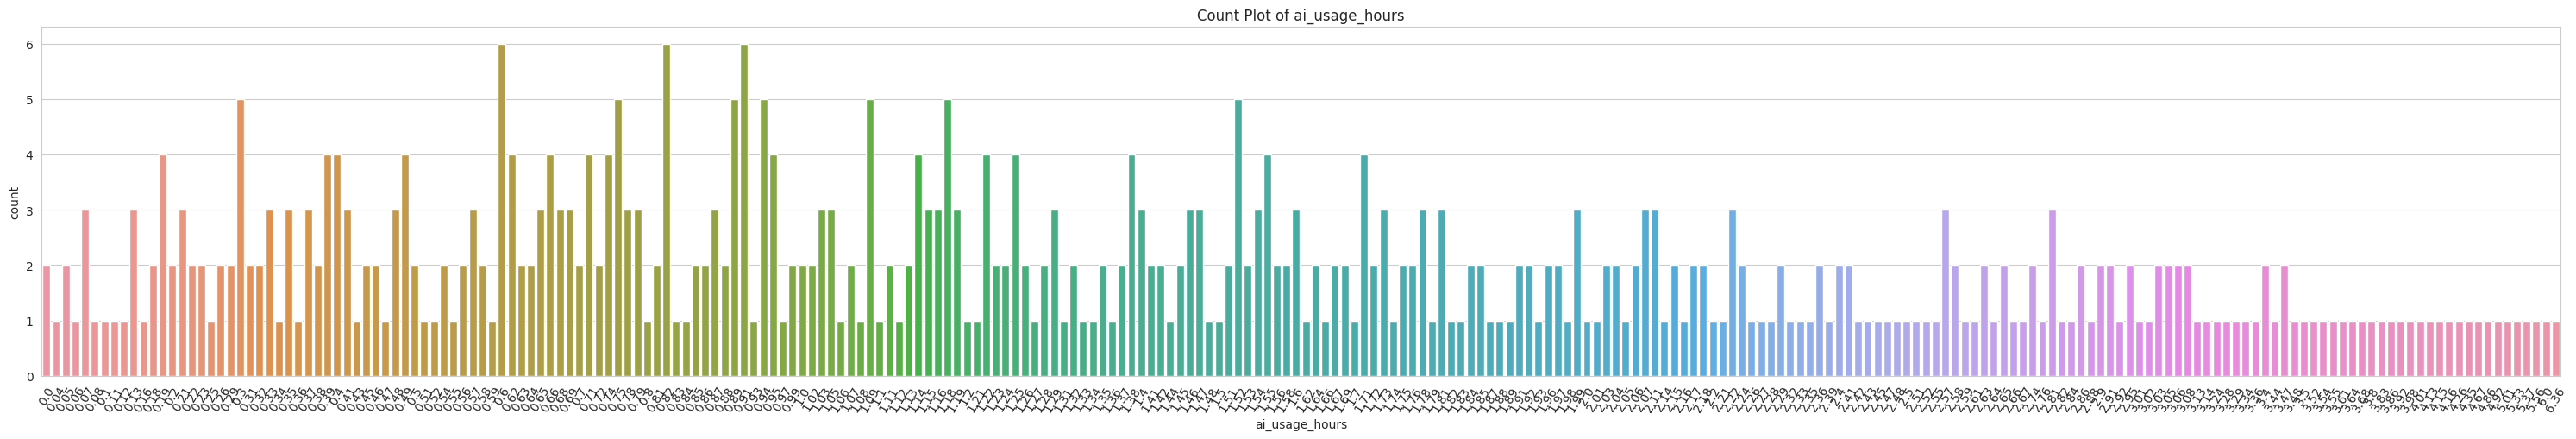

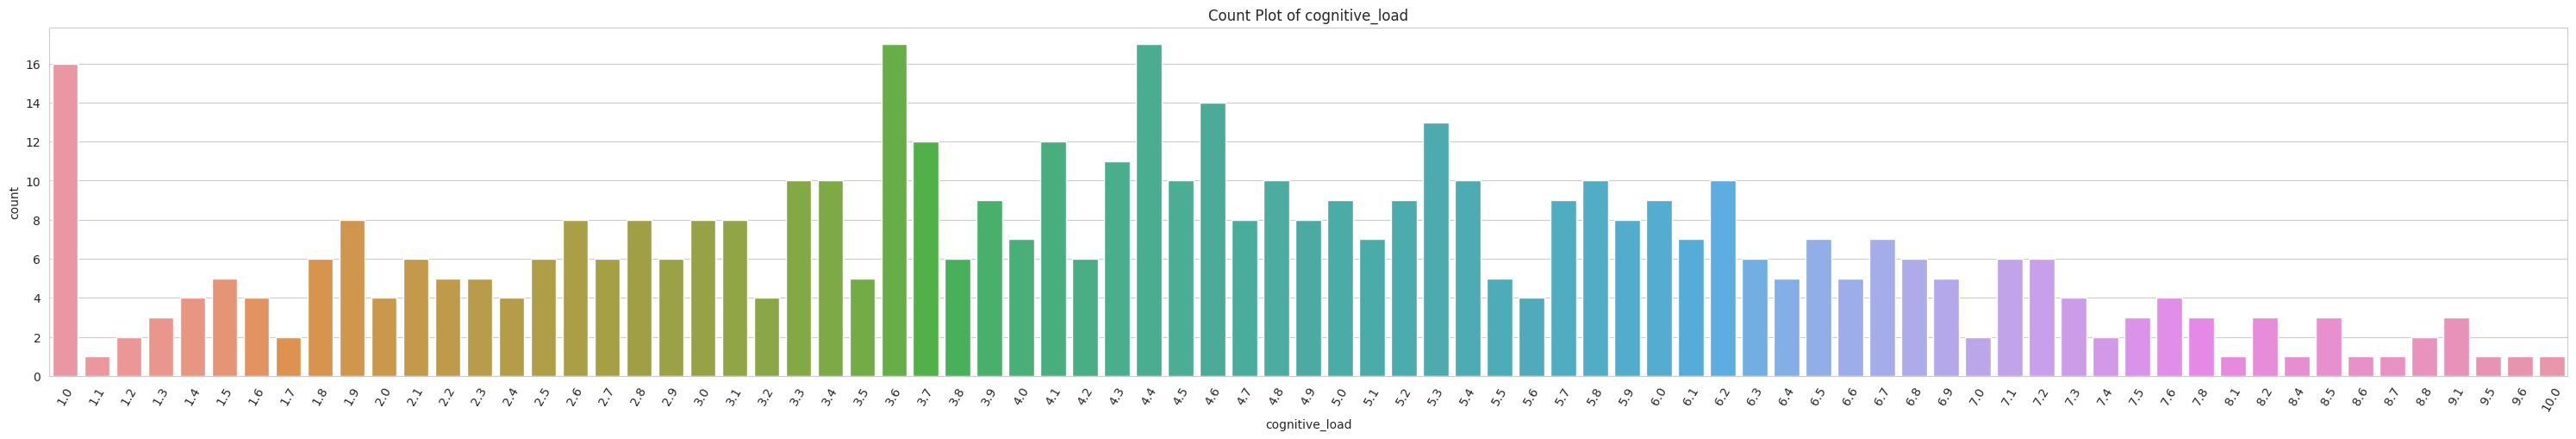

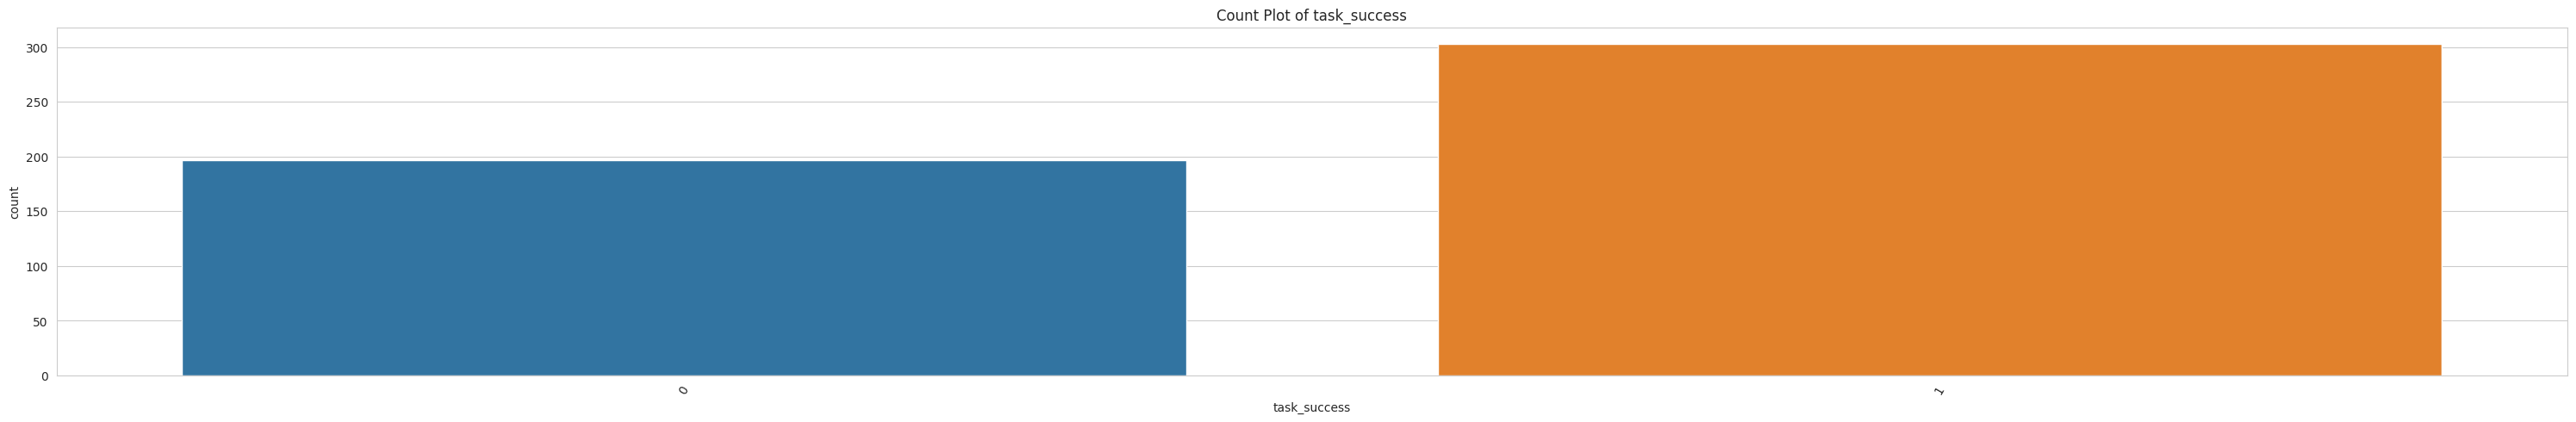

In [12]:
for features in cols2:
    if features in df.columns:
        plt.figure(figsize=(30,5))
        sns.countplot(x=features,data = df)
        plt.title(f"Count Plot of {features}")
        plt.xlabel(features)
        plt.ylabel('count')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# KDE Plot

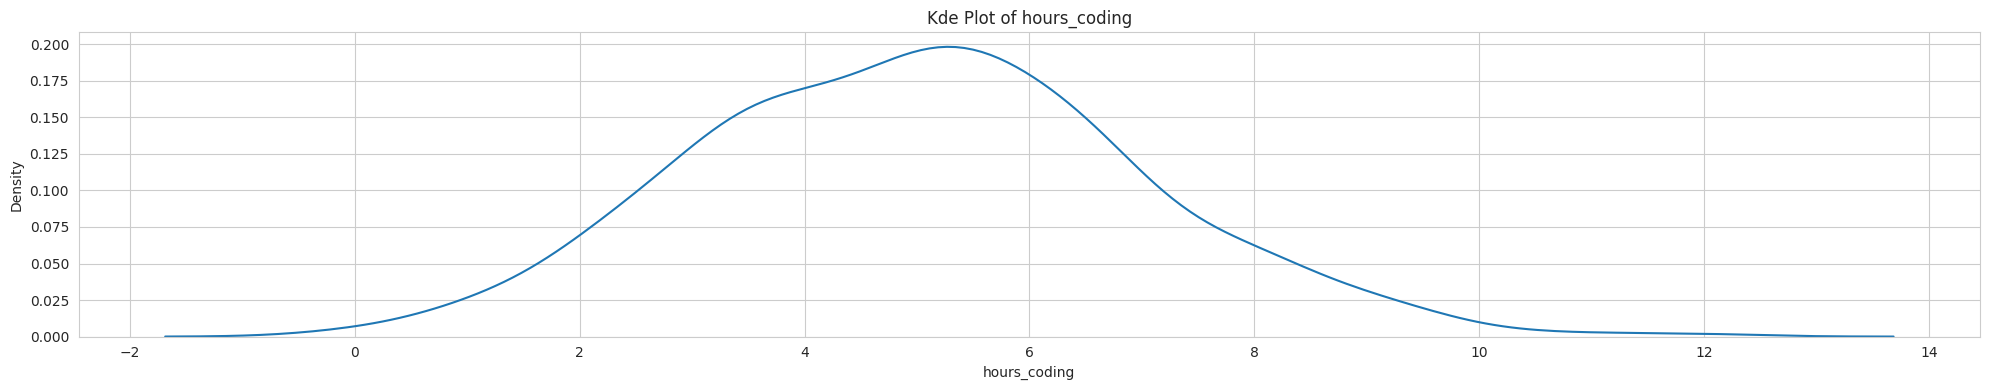

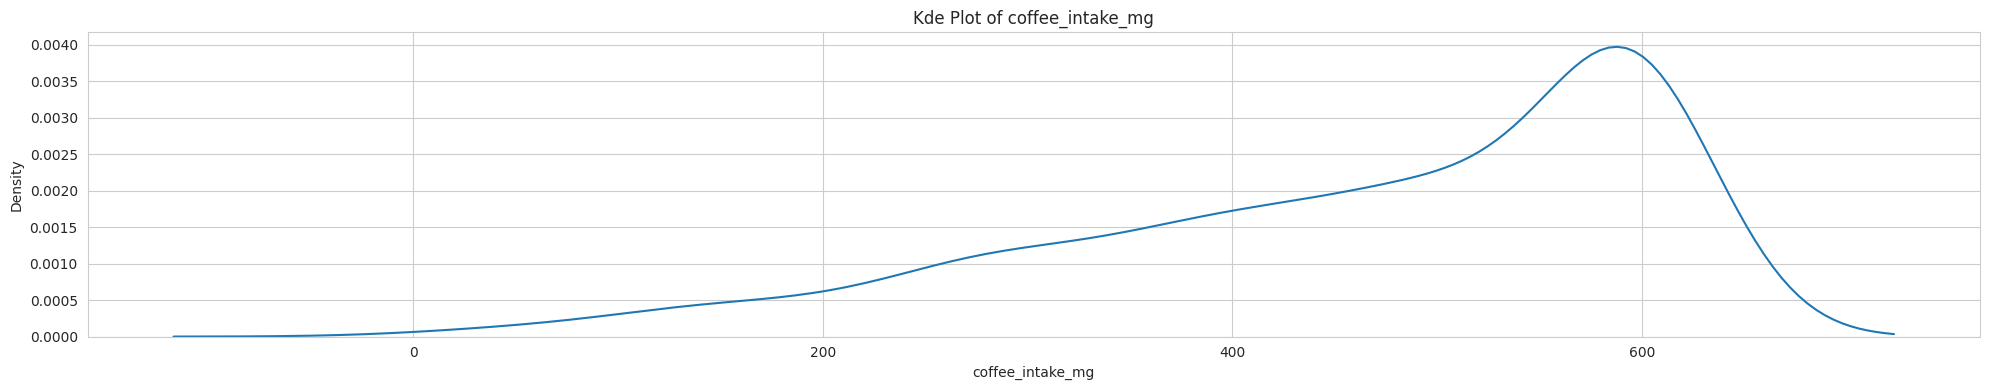

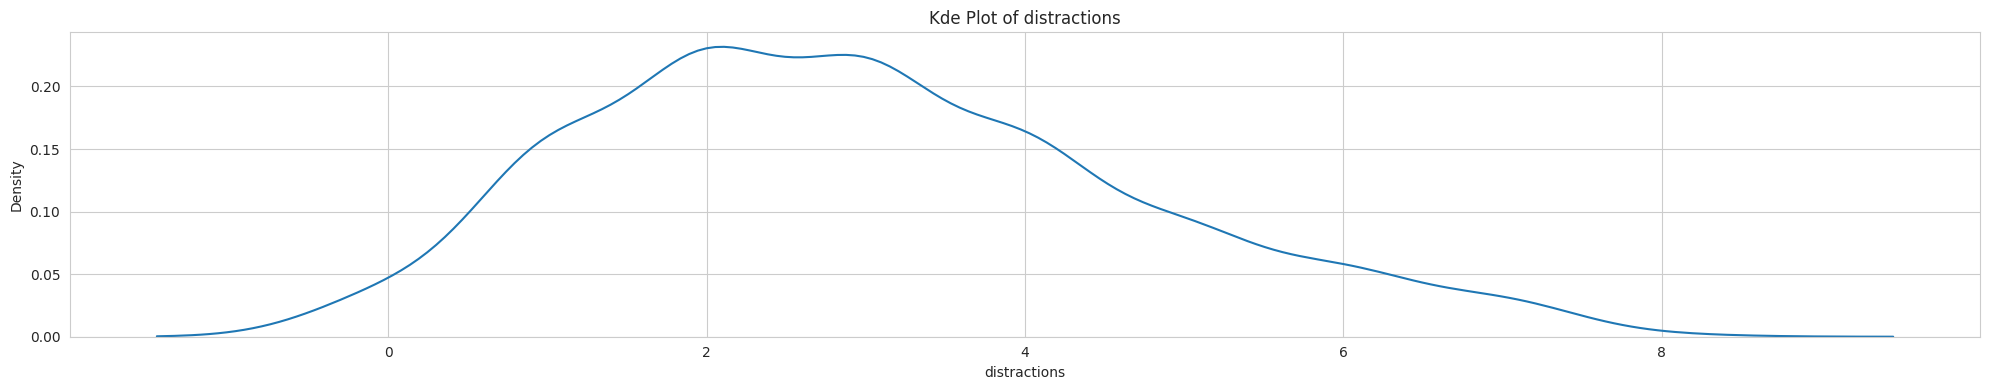

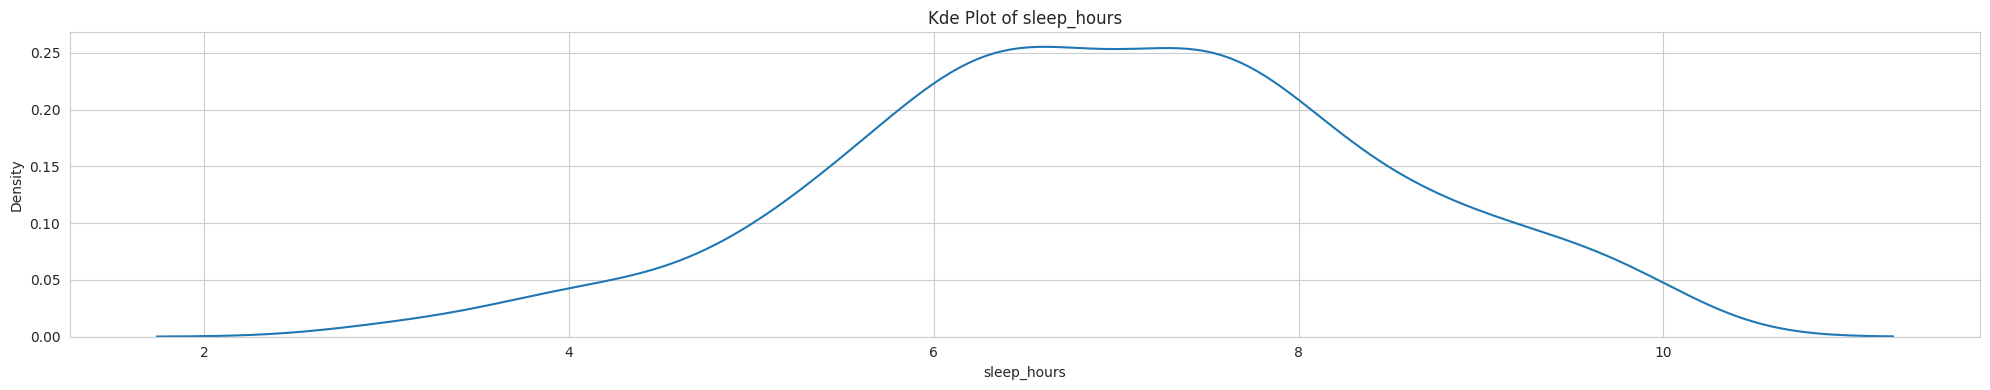

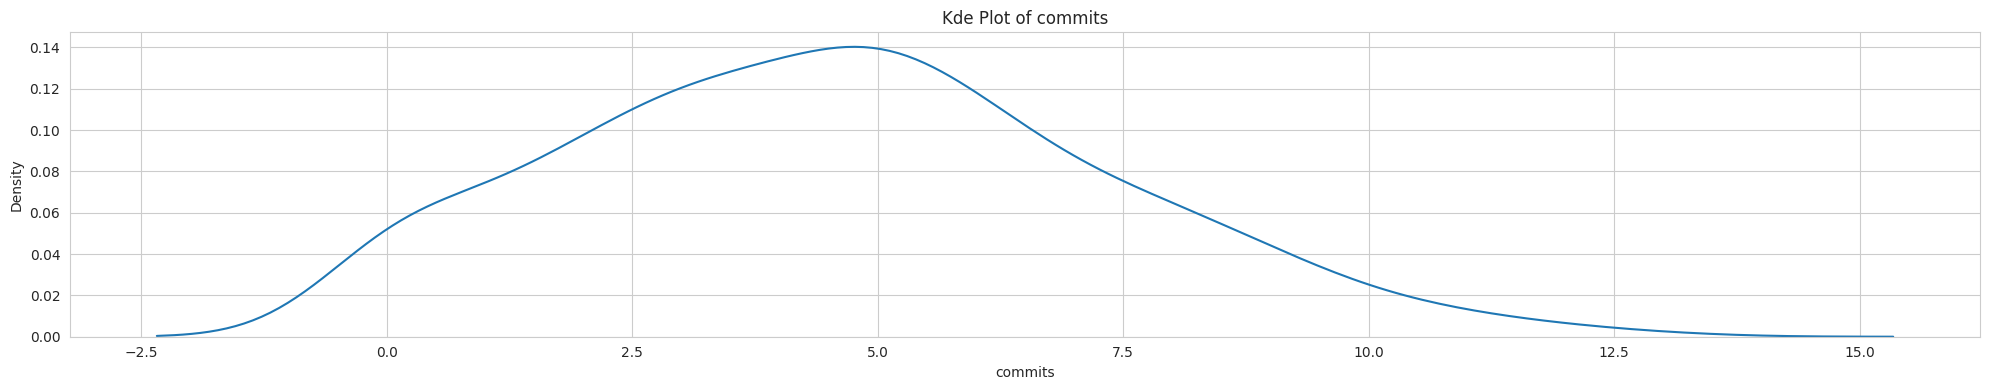

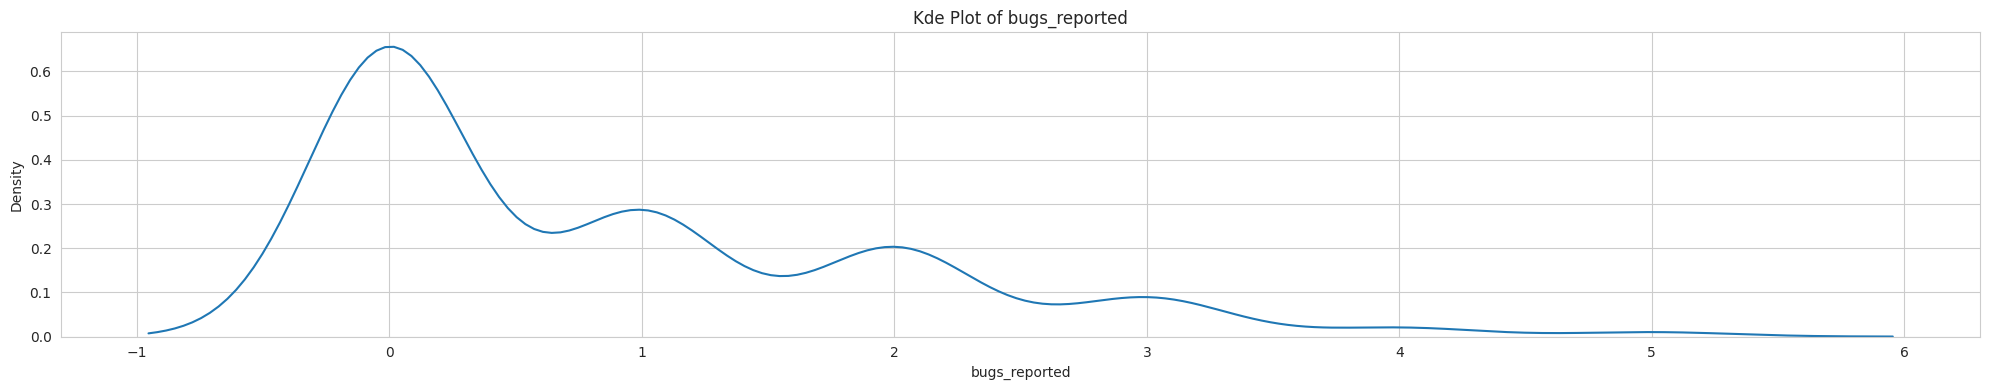

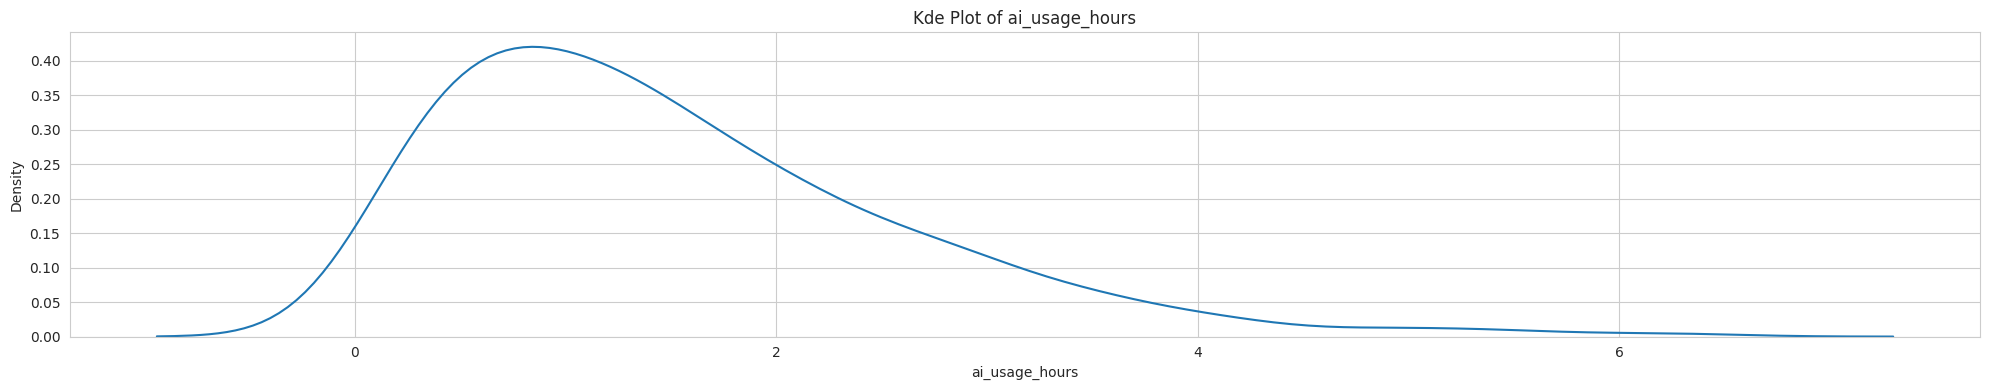

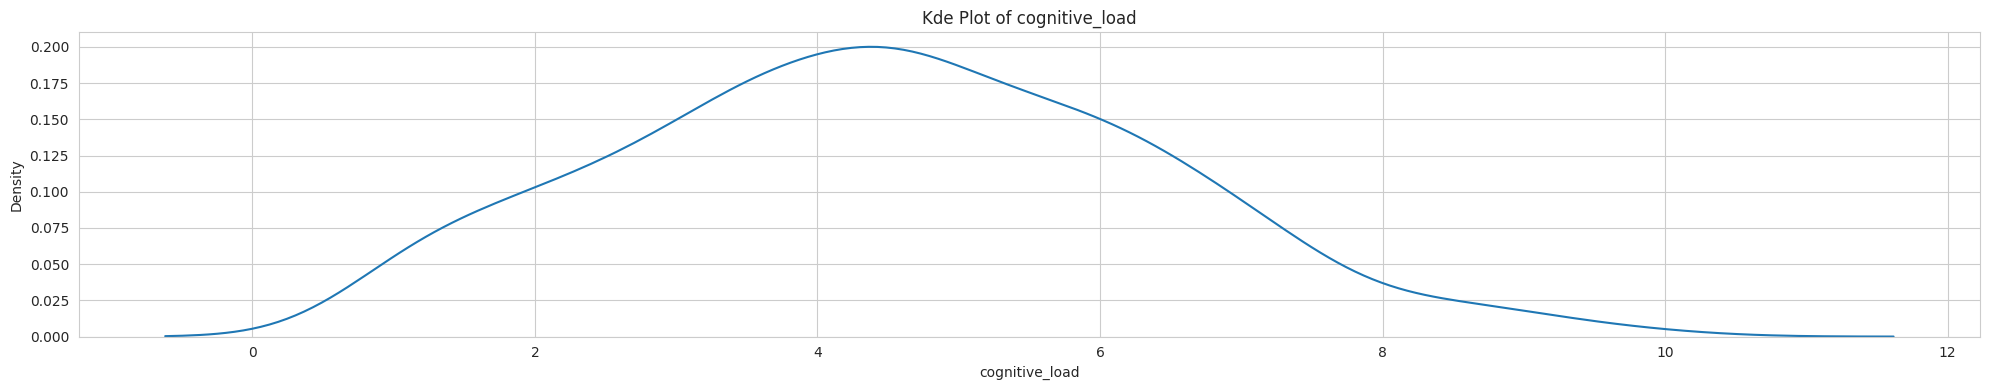

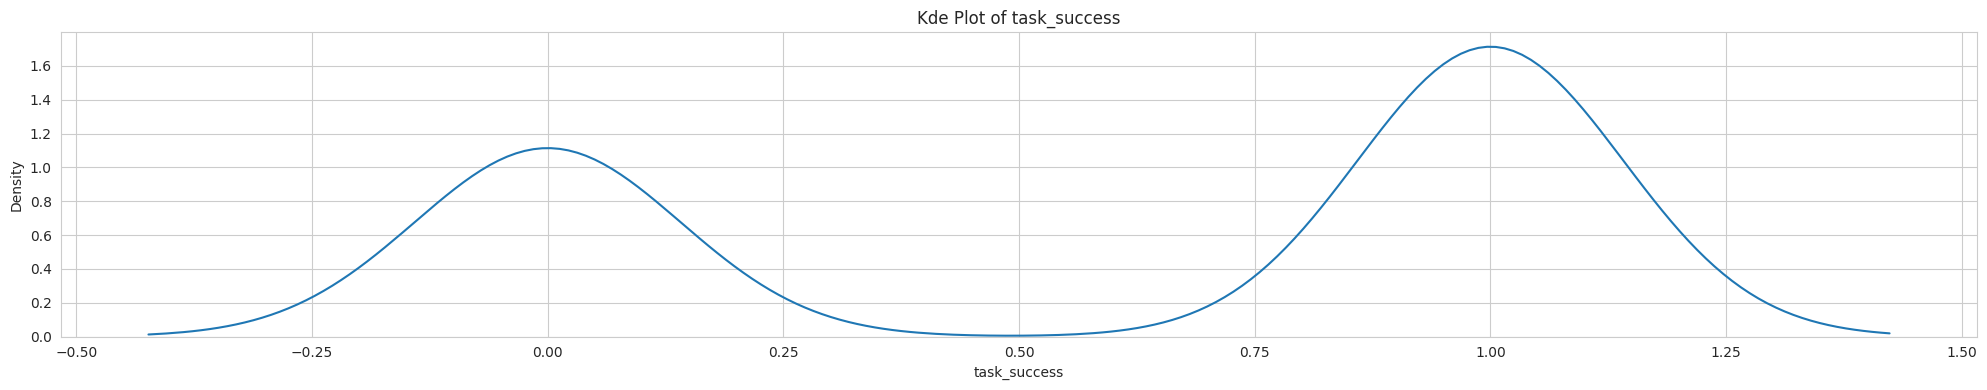

In [13]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,4))
        sns.kdeplot(data=df,x= features)
        plt.title(f"Kde Plot of {features}")
        plt.tight_layout()
        plt.show()

# Correlation Matrix

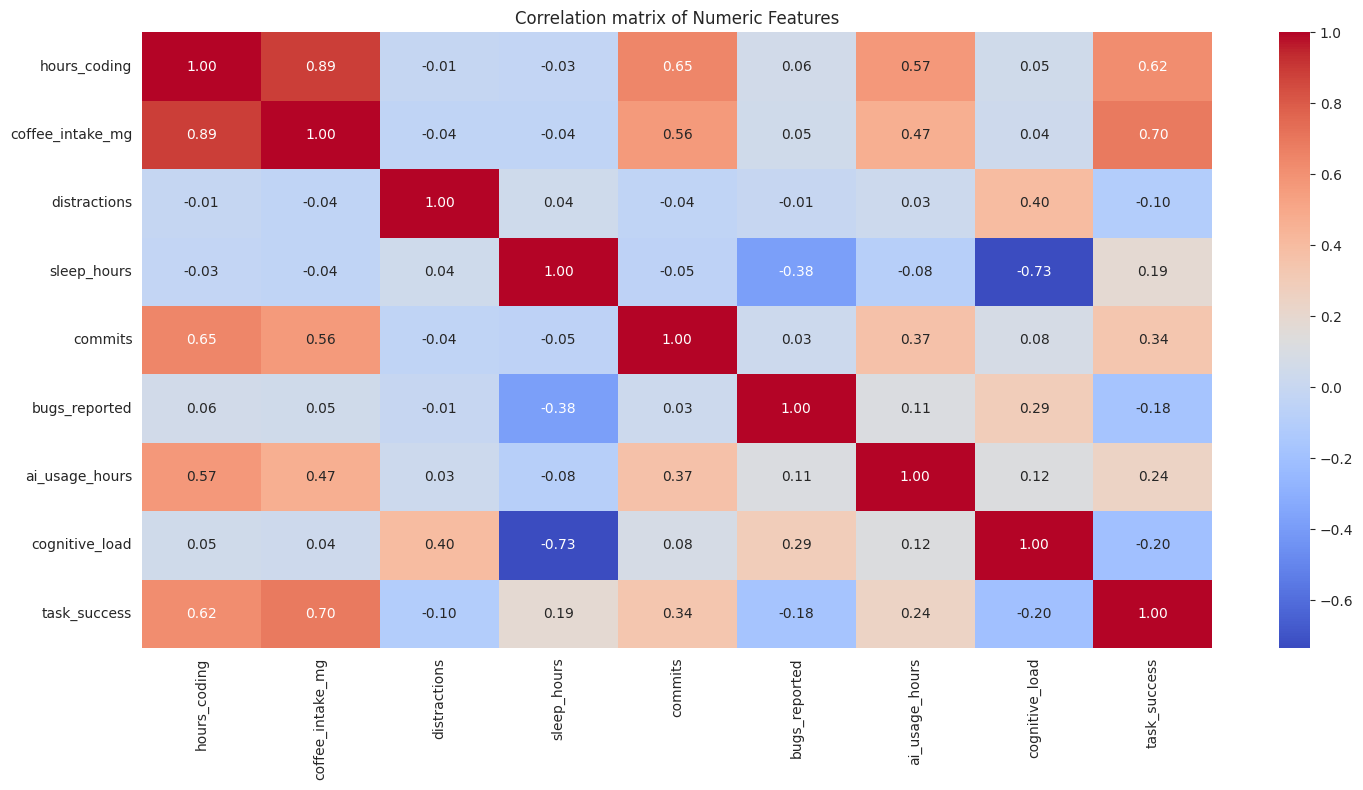

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f"Correlation matrix of Numeric Features")
    plt.tight_layout()
    plt.show()

# Model Section

In [15]:
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score,f1_score,accuracy_score,precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SGDClassifier": SGDClassifier(),
    "PassiveAggressive": PassiveAggressiveClassifier(),
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(verbosity=0),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [19]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

In [20]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1 Score
16            CatBoost      1.00     1.0000    1.00    1.0000
9     GradientBoosting      1.00     1.0000    1.00    1.0000
15            LightGBM      1.00     1.0000    1.00    1.0000
14             XGBoost      1.00     1.0000    1.00    1.0000
11             Bagging      1.00     1.0000    1.00    1.0000
10            AdaBoost      1.00     1.0000    1.00    1.0000
6         DecisionTree      1.00     1.0000    1.00    1.0000
7         RandomForest      0.99     0.9901    0.99    0.9900
8           ExtraTrees      0.96     0.9614    0.96    0.9603
12          KNeighbors      0.89     0.8892    0.89    0.8887
4        MultinomialNB      0.87     0.8692    0.87    0.8695
13                 SVC      0.87     0.8718    0.87    0.8658
3           GaussianNB      0.86     0.8626    0.86    0.8609
0   LogisticRegression      0.85     0.8544    0.85    0.8514
1        SGDClassifier      0.76     0.8020    0.76    0.7663
5       

# Conclusion:

> Around ~8 Models predicting 100% results.